<a href="https://colab.research.google.com/github/anisdeladesela/Project/blob/main/Unsupervised%20K-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
data = pd.read_csv('ecommerce_data.csv', encoding="ISO-8859-1", dtype={'CustomerID': str,'InvoiceID': str})

In [ ]:
data.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [ ]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [ ]:
data.to_csv('ecommerce_data.csv')

# HOMEWORK : RFM Analysis Using K-Means or Hierarchical Clustering
RFM is one of the most populer clustering techniques. It is widely used in customer segmentation. RFM itself is the acronym for Recency, Frequency, and Monetary. In this Homeworks, you are requested to conduct some RFM Analysis on the E-Commerce Data.

1. Calculate Recency, Frequency, and Monetary for each customer. The RFM can be defined as follows :
    - Recency : last date available in Dataset - last date of purchase each customer
    - Frequency : calculate frequency of purchases, count each particular InvoiceNo 
    - Monetary : Quantity * UnitPrice (Sum of total cost)
    

2. Find The best number of clusters using Elbow Method (in K-Means) or Dendrogram (in Hierarchical)


3. Try to do customer segmentation using the RFM data with number of cluster that you decided before. 


4. Visualize your segmentation using the RFM as the axis. Add some hue or other dimension style to make all RFM aspects visualized. Consider using pairplot as well.


5. Evaluate your Clustering Model Using Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index


6. Interpret each clusters. ex : best customer, big spenders, loyal customer, churned customer, etc.

## Preprocessing Data

In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

CustomerID dan Description yang null akan dihapuskan

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


### No. 1
Calculate Recency, Frequency, and Monetary for each customer. The RFM can be defined as follows :
- Recency : last date available in Dataset - last date of purchase each customer
- Frequency : calculate frequency of purchases, count each particular InvoiceNo
- Monetary : Quantity * UnitPrice (Sum of total cost)

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


**Recency**

In [ ]:
#Mengubah tipe data InvoiceDate menjadi tanggal
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
#last recent date
last_recent_date = data['InvoiceDate'].max()

In [ ]:
last_recent_date

Timestamp('2011-12-09 12:50:00')

In [ ]:
recency = data.copy()

In [ ]:
recency['last_recent_date'] = last_recent_date

In [ ]:
recency

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,last_recent_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2011-12-09 12:50:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-12-09 12:50:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2011-12-09 12:50:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-12-09 12:50:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-12-09 12:50:00
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12-09 12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12-09 12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09 12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09 12:50:00


In [ ]:
recency['Recency'] = pd.DataFrame(recency['last_recent_date'] - recency['InvoiceDate'])

In [ ]:
recency

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,last_recent_date,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12-09 12:50:00,0 days 00:00:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12-09 12:50:00,0 days 00:00:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09 12:50:00,0 days 00:00:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09 12:50:00,0 days 00:00:00


**Frequency**

In [ ]:
frequency = data.groupby(['CustomerID']).count()[['InvoiceNo']]

In [ ]:
frequency

,InvoiceNo
CustomerID,
12346,2
12347,182
12348,31
12349,73
12350,17
...,...
18280,10
18281,7
18282,13


**Monetary**

In [ ]:
monetary = data.copy()

In [ ]:
monetary['Monetary'] = data['Quantity']*data['UnitPrice']

In [ ]:
monetary = monetary[['CustomerID', 'Monetary']]

In [ ]:
monetary = pd.DataFrame(monetary.groupby(['CustomerID'])['Monetary'].sum())
monetary

,Monetary
CustomerID,
12346,0.00
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40
...,...
18280,180.60
18281,80.82
18282,176.60


**Menggabungkan data recency, frequency, dan monetary**

In [ ]:
#recency dan frequency
data1 = pd.merge(recency, frequency, how = 'inner', on = 'CustomerID')
data1

,InvoiceNo_x,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,last_recent_date,Recency,InvoiceNo_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00,312
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00,312
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00,312
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00,312
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00,312
...,...,...,...,...,...,...,...,...,...,...,...
406824,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713,Germany,2011-12-09 12:50:00,0 days 00:34:00,38
406825,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713,Germany,2011-12-09 12:50:00,0 days 00:34:00,38
406826,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713,Germany,2011-12-09 12:50:00,0 days 00:34:00,38
406827,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713,Germany,2011-12-09 12:50:00,0 days 00:34:00,38


In [ ]:
data1['Frequency'] = data1['InvoiceNo_y']

In [ ]:
data1.drop(['InvoiceNo_x', 'StockCode', 'InvoiceNo_y'], axis = 1, inplace = True)

In [ ]:
data1

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,last_recent_date,Recency,Frequency
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00,312
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00,312
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00,312
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00,312
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00,312
...,...,...,...,...,...,...,...,...,...
406824,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713,Germany,2011-12-09 12:50:00,0 days 00:34:00,38
406825,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713,Germany,2011-12-09 12:50:00,0 days 00:34:00,38
406826,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713,Germany,2011-12-09 12:50:00,0 days 00:34:00,38
406827,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713,Germany,2011-12-09 12:50:00,0 days 00:34:00,38


In [ ]:
data2 = pd.merge(data1, monetary, how = 'inner', on = 'CustomerID')

In [ ]:
data2

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,last_recent_date,Recency,Frequency,Monetary
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00,312,5288.63
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00,312,5288.63
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00,312,5288.63
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00,312,5288.63
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00,312,5288.63
...,...,...,...,...,...,...,...,...,...,...
406824,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713,Germany,2011-12-09 12:50:00,0 days 00:34:00,38,848.55
406825,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713,Germany,2011-12-09 12:50:00,0 days 00:34:00,38,848.55
406826,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713,Germany,2011-12-09 12:50:00,0 days 00:34:00,38,848.55
406827,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713,Germany,2011-12-09 12:50:00,0 days 00:34:00,38,848.55


In [ ]:
data2['Recency'] = data2['Recency'].astype('str')

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 406828
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Description       406829 non-null  object        
 1   Quantity          406829 non-null  int64         
 2   InvoiceDate       406829 non-null  datetime64[ns]
 3   UnitPrice         406829 non-null  float64       
 4   CustomerID        406829 non-null  object        
 5   Country           406829 non-null  object        
 6   last_recent_date  406829 non-null  datetime64[ns]
 7   Recency           406829 non-null  object        
 8   Frequency         406829 non-null  int64         
 9   Monetary          406829 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 34.1+ MB


In [ ]:
data2[['First','Second', 'Last']] = data2.Recency.str.split(" ",expand=True)
data2

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,last_recent_date,Recency,Frequency,Monetary,First,Second,Last
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00,312,5288.63,373,days,04:24:00
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00,312,5288.63,373,days,04:24:00
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00,312,5288.63,373,days,04:24:00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00,312,5288.63,373,days,04:24:00
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-12-09 12:50:00,373 days 04:24:00,312,5288.63,373,days,04:24:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406824,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713,Germany,2011-12-09 12:50:00,0 days 00:34:00,38,848.55,0,days,00:34:00
406825,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713,Germany,2011-12-09 12:50:00,0 days 00:34:00,38,848.55,0,days,00:34:00
406826,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713,Germany,2011-12-09 12:50:00,0 days 00:34:00,38,848.55,0,days,00:34:00
406827,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713,Germany,2011-12-09 12:50:00,0 days 00:34:00,38,848.55,0,days,00:34:00


In [ ]:
data3 = data2.copy()

In [ ]:
data_baru = data3[['First', 'Frequency', 'Monetary']]
data_baru

,First,Frequency,Monetary
0,373,312,5288.63
1,373,312,5288.63
2,373,312,5288.63
3,373,312,5288.63
4,373,312,5288.63
...,...,...,...
406824,0,38,848.55
406825,0,38,848.55
406826,0,38,848.55
406827,0,38,848.55


In [ ]:
data_baru['Recency'] = data_baru['First']

<ipython-input-38-c2bf0557363e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_baru['Recency'] = data_baru['First']


In [ ]:
data_baru.drop(['First'], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
data_baru = data_baru.reset_index()
data_baru

,index,Frequency,Monetary,Recency
0,0,312,5288.63,373
1,1,312,5288.63,373
2,2,312,5288.63,373
3,3,312,5288.63,373
4,4,312,5288.63,373
...,...,...,...,...
406824,406824,38,848.55,0
406825,406825,38,848.55,0
406826,406826,38,848.55,0
406827,406827,38,848.55,0


In [ ]:
data_baru.drop(['index'], axis = 1, inplace = True)

In [ ]:
data_baru

,Frequency,Monetary,Recency
0,312,5288.63,373
1,312,5288.63,373
2,312,5288.63,373
3,312,5288.63,373
4,312,5288.63,373
...,...,...,...
406824,38,848.55,0
406825,38,848.55,0
406826,38,848.55,0
406827,38,848.55,0


### No. 2

Find The best number of clusters using Elbow Method (in K-Means) or Dendrogram (in Hierarchical)

**Elbow Method**

In [ ]:
inertia = []

for i in range(1, 10):
    model = KMeans(n_clusters = i, random_state = 42)
    model.fit(data_baru)
    inertia.append(model.inertia_)
    
inertia_df = pd.DataFrame({'Inertia' : inertia}, index = [i for i in range(1, 10)])
inertia_df

,Inertia
1,3.705721e+14
2,1.051939e+14
3,5.165533e+13
4,1.312871e+13
5,8.356031e+12
6,5.381720e+12
7,4.201138e+12
8,3.354783e+12
9,2.351178e+12


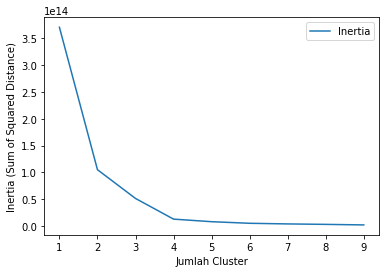

In [ ]:
inertia_df.plot(kind = 'line')
plt.ylabel('Inertia (Sum of Squared Distance)')
plt.xlabel('Jumlah Cluster')
plt.show()

Berdasarkan plot inertia di atas, akan diambil dua buah opsi cluster. Yaitu cluster dengan k = 2, dan cluster dengan k = 4

**Dendogram**

### No. 3
Try to do customer segmentation using the RFM data with number of cluster that you decided before.

In [ ]:
data_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Frequency  406829 non-null  int64  
 1   Monetary   406829 non-null  float64
 2   Recency    406829 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 9.3+ MB


In [ ]:
data_baru['Recency'] = data_baru['Recency'].astype('float')

In [ ]:
data_baru['Frequency'] = data_baru['Frequency'].astype('float')

In [ ]:
data_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Frequency  406829 non-null  float64
 1   Monetary   406829 non-null  float64
 2   Recency    406829 non-null  float64
dtypes: float64(3)
memory usage: 9.3 MB


In [ ]:
data_baru

,Frequency,Monetary,Recency
0,312.0,5288.63,373.0
1,312.0,5288.63,373.0
2,312.0,5288.63,373.0
3,312.0,5288.63,373.0
4,312.0,5288.63,373.0
...,...,...,...
406824,38.0,848.55,0.0
406825,38.0,848.55,0.0
406826,38.0,848.55,0.0
406827,38.0,848.55,0.0


In [ ]:
#Ubah dataframe menjadi array

data_array = np.array(data_baru)
print(data_array)

[[ 312.   5288.63  373.  ]
 [ 312.   5288.63  373.  ]
 [ 312.   5288.63  373.  ]
 ...
 [  38.    848.55    0.  ]
 [  38.    848.55    0.  ]
 [  38.    848.55    0.  ]]


In [ ]:
#Dilakukan penyamaan skala
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_array)
data_scaled

array([[0.03896267, 0.03374576, 1.        ],
       [0.03896267, 0.03374576, 1.        ],
       [0.03896267, 0.03374576, 1.        ],
       ...,
       [0.00463543, 0.01809937, 0.        ],
       [0.00463543, 0.01809937, 0.        ],
       [0.00463543, 0.01809937, 0.        ]])

**Customer segmentation dengan k = 2**

In [ ]:
# Menentukan dan mengkonfigurasi fungsi kmeans
kmeans = KMeans(n_clusters = 2, random_state=123)
# Menentukan cluster dari data
kmeans.fit(data_scaled)

KMeans(n_clusters=2, random_state=123)

In [ ]:
kmeans.predict(data_scaled)

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
data_baru['Clusters'] = kmeans.predict(data_scaled)
data_baru

,Frequency,Monetary,Recency,Clusters
0,312.0,5288.63,373.0,1
1,312.0,5288.63,373.0,1
2,312.0,5288.63,373.0,1
3,312.0,5288.63,373.0,1
4,312.0,5288.63,373.0,1
...,...,...,...,...
406824,38.0,848.55,0.0,0
406825,38.0,848.55,0.0,0
406826,38.0,848.55,0.0,0
406827,38.0,848.55,0.0,0


**Customer Segmentation dengan k = 4**

In [ ]:
# Menentukan dan mengkonfigurasi fungsi kmeans
kmeans2 = KMeans(n_clusters = 4, random_state=123)
# Menentukan cluster dari data
kmeans2.fit(data_scaled)

KMeans(n_clusters=4, random_state=123)

In [ ]:
kmeans2.predict(data_scaled)

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
data_baru['Clusters2'] = kmeans2.predict(data_scaled)
data_baru

,Frequency,Monetary,Recency,Clusters,Clusters2
0,312.0,5288.63,373.0,1,1
1,312.0,5288.63,373.0,1,1
2,312.0,5288.63,373.0,1,1
3,312.0,5288.63,373.0,1,1
4,312.0,5288.63,373.0,1,1
...,...,...,...,...,...
406824,38.0,848.55,0.0,0,0
406825,38.0,848.55,0.0,0,0
406826,38.0,848.55,0.0,0,0
406827,38.0,848.55,0.0,0,0


In [ ]:
data_baru['Clusters'].unique()

array([1, 0])

In [ ]:
data_baru['Clusters2'].unique()

array([1, 3, 0, 2])

### No.4
Visualize your segmentation using the RFM as the axis. Add some hue or other dimension style to make all RFM aspects visualized. Consider using pairplot as well.

**Untuk k = 2**

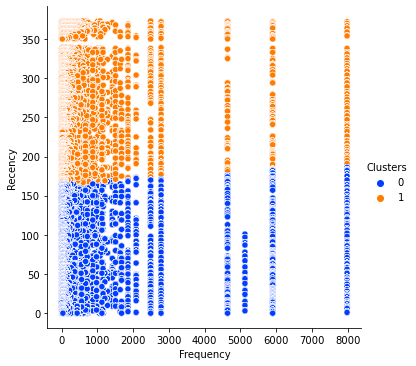

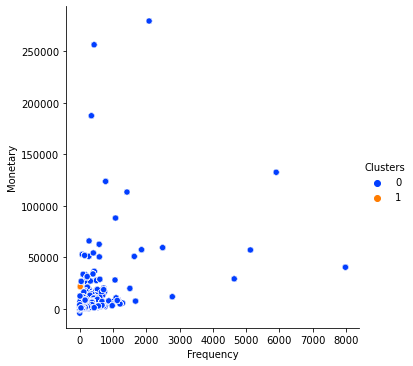

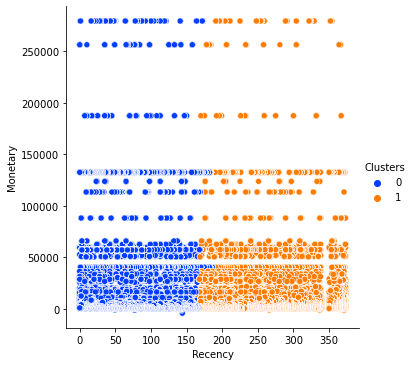

In [ ]:
sns.relplot(x = 'Frequency', y = 'Recency', data = data_baru, hue = 'Clusters',palette = 'bright')
sns.relplot(x = 'Frequency', y = 'Monetary', data = data_baru, hue = 'Clusters', palette = 'bright')
sns.relplot(x = 'Recency', y = 'Monetary', data = data_baru, hue = 'Clusters', palette = 'bright')

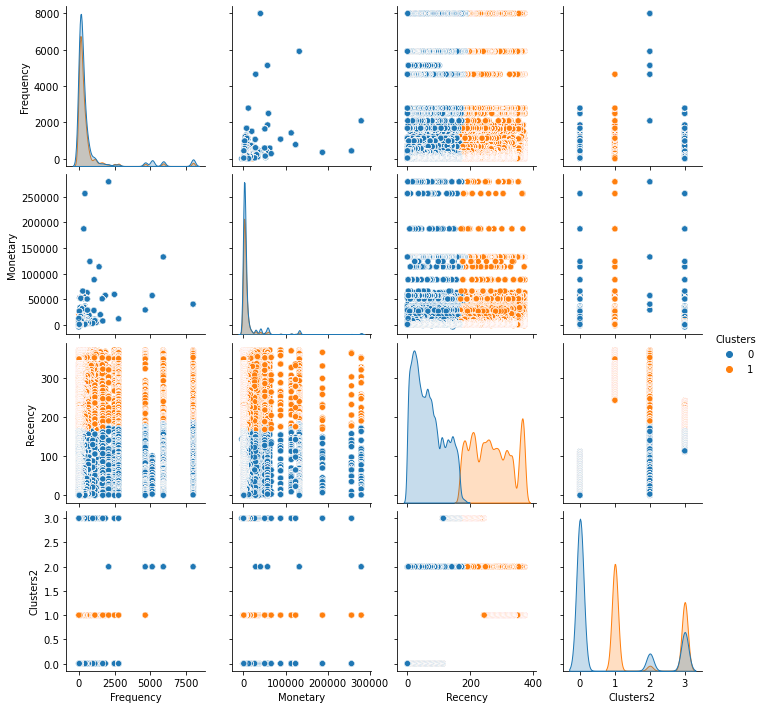

In [ ]:
sns.pairplot(data_baru, hue = 'Clusters')

**Untuk k = 4**

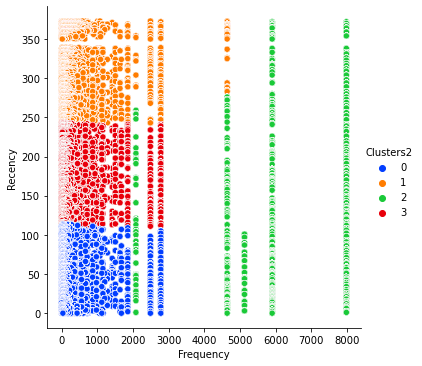

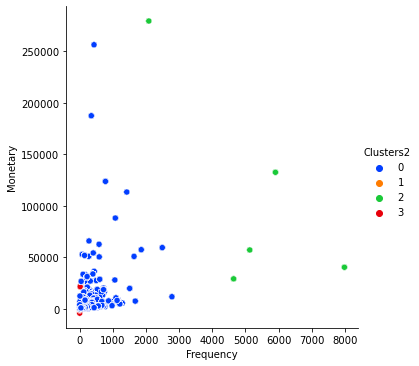

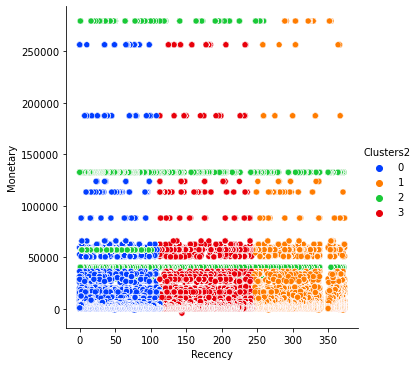

In [ ]:
sns.relplot(x = 'Frequency', y = 'Recency', data = data_baru, hue = 'Clusters2',palette = 'bright')
sns.relplot(x = 'Frequency', y = 'Monetary', data = data_baru, hue = 'Clusters2', palette = 'bright')
sns.relplot(x = 'Recency', y = 'Monetary', data = data_baru, hue = 'Clusters2', palette = 'bright')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


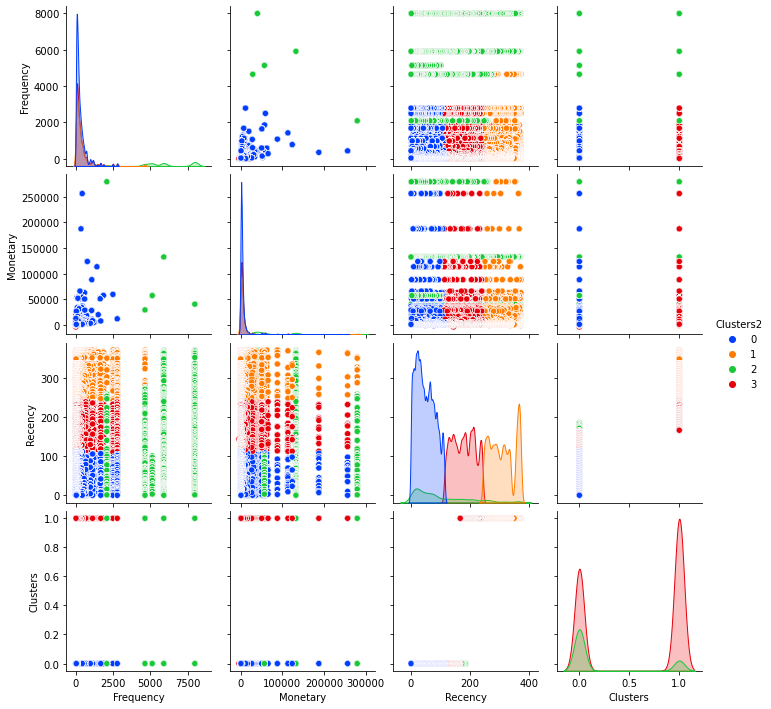

In [ ]:
sns.pairplot(data_baru, hue = 'Clusters2', palette = 'bright')

### No.5

Evaluate your Clustering Model Using Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [ ]:
#Convert dataframe ke numpy array
data_array = data_baru.values

In [ ]:
data_cluster1 = data_baru['Clusters'].values
data_cluster2 = data_baru['Clusters'].values

**Silhouette Score**

In [ ]:
data_baru.shape

(406829, 5)

Untuk melakukan perhitungan Silhouette Score, yang digunakan hanyalah 10000 data (dengan sampling random), karena apabila menggunakan seluruh data, hasil nilai evaluasi tidak dapat keluar (data terlalu besar)

In [ ]:
silhouette_k2 = silhouette_score(data_baru, data_baru['Clusters'], sample_size = 10000, random_state = 42)
silhouette_k4 = silhouette_score(data_baru, data_baru['Clusters2'], sample_size = 10000, random_state = 42)

**Calinski-Harabasz Index**

In [ ]:
calinski_k2 = calinski_harabasz_score(data_baru, data_baru['Clusters'])
calinski_k4 = calinski_harabasz_score(data_baru, data_baru['Clusters2'])

**Davis-Bouldin Index**

In [ ]:
dbi_k2 = davies_bouldin_score(data_baru, data_baru['Clusters'])
dbi_k4 = davies_bouldin_score(data_baru, data_baru['Clusters2'])

In [ ]:
model_selection = pd.DataFrame({'KMeans k = 2' : [silhouette_k2, calinski_k2, dbi_k2],
                                'KMeans k = 4' : [silhouette_k4, calinski_k4, dbi_k4]},
                                index = ['Silhouette Score', 'Calinski Index', 'Davies-Bouldin'])
model_selection

#yang lebih rendah yang lebih baik

,KMeans k = 2,KMeans k = 4
Silhouette Score,-0.019461,-0.035693
Calinski Index,422.266540,69525.881944
Davies-Bouldin,14.006279,12.496468


Berdasarkan hasil evaluasi k-means dengan k = 2 dan k = 4, diperoleh hasil sebagai berikut:
- Melalui Silhouette Score, nilai k = 4 lebih kecil dibandingkan dengan k = 2. Pada silhouette score dikatakan nilai semakin baik apabila semakin mendekati 1. Maka, melalui silhouette score didapatkan hasil bahwa clustering kmeans lebih baik dengan menggunakan k = 2.
- Melalui Calinski Index, semakin tinggi nilai Calinski Index, maka semakin baik performa clusteringnya. Dalam hal ini nilai Calinski-Index pada k = 4 lebih tinggi dibanding dengan k = 2. Oleh karena itu, melalui Calinski Index didapatkan hasil bahwa clustering kmeans lebih baik dengan menggunakan k = 4.
- Melalui Davies-Bouldin, semakin kecil nilai index Davies-Bouldin menyatakan separasi yang lebih baik antar cluster. Dalam hal ini nilai Davies-Bouldin yang lebih kecil diperoleh pada Cluster K-Means dengan k = 4.

Berdasarkan hasil evaluasi tersebut, saya mengambil kesimpulan bahwa cluster terbaik didapatkan pada Cluster K-Means dengan k = 4. Hal ini dikarenakan pada silhouette score data yang diambil hanyalah sampel sebesar 10.000 yang dikhawatirkan tidak dapat merangkum seluruh populasi dari data (hasil silhouette score pada python yang saya gunakan dapat keluar apabila menggunakan sampel 10.000).

### No.6

Interpret each clusters. ex : best customer, big spenders, loyal customer, churned customer, etc.

Berdasarkan hasil clustering dengan k = 4, diperoleh hasil sebagai berikut:

**Cluster 0 : Churned Customer**
- Frequency pembelian oleh customer paling sedikit diantara cluster lainnya
- Customer dengan pembelian dalam waktu dekat dengan saat ini
- Pendapatan yang didapat dari customer pada cluster 0 ini sebagian besar berkisar pada harga 50.000 dan tersebar hingga 250.000

**Cluster 1 : Loyal Customer**
- Customer dengan pembelian dalam waktu yang jauh dengan saat ini 
- Frequency pembelian dari customer cenderung kecil
- Pendapatan yang didapat dari customer pada cluster ini sebagian besar berkisar pada harga 50.000 dan ada beberapa yang mencapai lebih dari 250.000

**Cluster 2 : Best Customer** 
- Frequency pembelian dari customer paling besar dibanding cluster lainnya
- Customer dengan pembelian bervariasi, dalam waktu dekat ataupun waktu yang lama
- Pendapatan yang didapat dari customer pada cluster ini paling tinggi dibanding cluster lainnya, tersebar mulai dari 50.000 hingga cukup banyak customer dengan pembelian di atas 250.000

**Cluster 3 : Regular Customer** 
- Frequency pembelian dari customer cenderung kecil
- Customer dengan pembelian bervariasi, dalam yang tidak terlalu dekat ataupun tidak terlalu jauh (sedang)
- Pendapatan yang didapat dari customer pada cluster ini sebagian besar berkisar pada harga 50.000 dan tersebar hingga 250.000